## Sprint9 NN(ニューラルネットワーク)の実装
・スクラッチを通してニューラルネットワークの基礎を理解する     
・基本的な深層学習のキーワードを学習する      
・画像データの簡単な扱い方を知る

### データセットの用意

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
# 保存先を指定
mnist_dir = "/Users/andoutakaaki/DIC_study/sprint9/mnist_data/"

# MNISTの読み込み
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)
# trainとtestに分割する
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.14285)
# ラベルをint型にしておく
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

### データセットの確認

In [2]:
print(X_train.shape) # (60000, 784)
print(X_test.shape) # (10000, 784)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 784)
(10000, 784)
uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 134 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 139   9   0   0   0   0   0   0   0   0   0 248 253 253 253 253 253
 253 253 253 253 25

In [3]:
print(y_train.shape) 
print(y_test.shape) 
print(y_train[0])

(60000,)
(10000,)
7


訓練セットの最初の正解がでた

### 画像データの可視化

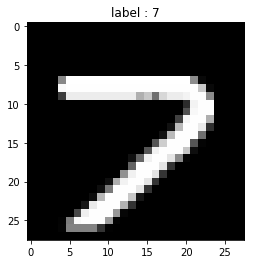

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

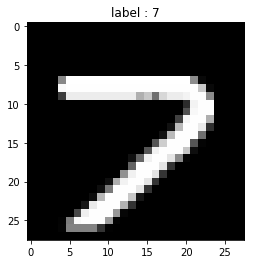

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

### 前処理
画像は0から255のuint8型で表されたが、機械学習をする上では0から1のfloat型に変更する。

In [6]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


正解ラベルは0から9の整数であるが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換する。

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)

print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In [9]:
y_train_one_hot[0]


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

### 重みの初期値

In [10]:
# n_features = 784
# n_node1 = 400
# sigma = 0.01  # ガウス分布の標準偏差
# W1 = sigma * np.random.randn(n_features, n_node1)
# # W1: (784, 400)

In [11]:
# １層目の重み（行７８４、列４００）
n_features1 = 784
n_node1 = 400
sigma = 0.01

w1 = sigma*np.random.randn(n_features1, n_node1)
b1 = sigma*np.random.randn(n_node1)

# ２層目の重み（行４００、列２００）
n_features2 = 400
n_node2 = 200

w2 = sigma*np.random.randn(n_features2, n_node2)
b2 = sigma*np.random.randn(n_node2)

# 3層目の重み（行２００、列１０）
n_features3 = 200
n_node3 = 10

w3 = sigma*np.random.randn(n_features3, n_node3)
b3 = sigma*np.random.randn(n_node3)

### ミニバッチ処理

In [12]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)または(n_samples,)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード

    Retruns
    ----------
    for文で呼び出すと以下の2つを返す。最後のイテレーションでは、バッチサイズより小さいこともある。
    mini_X : 次の形のndarray, shape (batch_size, n_features)
      学習データのミニバッチ
    mini_y : 次の形のndarray, shape (batch_size, 1)または(batch_size,)
      正解値のミニバッチ
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        # ランダムに並べ換える
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._counter = 0
        # イテレーション数を計算する
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        # len()が使われたときの処理
        return self._stop

    def __iter__(self):
        return self

    def __next__(self):
        # for文で呼ばれた際のループごとの処理
        if self._counter >= self._stop:
            # 最後まで進んだら終了
            self._counter = 0 # カウンターをリセット
            raise StopIteration()

        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

このクラスをニューラルネットワークのクラス内でインスタンス化し、for文を使うことでミニバッチが取り出せる。

In [13]:
# 以下をニューラルネットワークのクラス内で呼び出す

get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=10)

print(len(get_mini_batch)) # 4800
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

4800


### 活性化関数の実装

In [ ]:
# 活性化関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y_pred, y_train):
    if y_pred.ndim == 1:
        y_train = y_train.reshape(1, y_train.size)
        y_pred = y_pred.reshape(1, y_pred.size)
    
    batch_size = y_pred.shape[0]
    return -np.sum(y_train * np.log(y_pred)) / batch_size

### 学習（フォワード、バックプロパゲーション）

In [ ]:
epoch = 100
for i in range(epoch):
    get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=10, seed=0)

    loss_list = []
    c = 0
    for mini_X_train, mini_y_train in get_mini_batch:
        # 1層目
        rayer1_pre = np.dot(mini_X_train, w1) + b1
        rayer1_out = sigmoid(rayer1_pre)

        # 2層目
        rayer2_pre = np.dot(rayer1_out, w2) + b2
        rayer2_out = sigmoid(rayer2_pre)

        # 3層目
        rayer3_pre = np.dot(rayer2_out, w3) + b3
        rayer3_out = softmax(rayer3_pre)
        # print(rayer3_out.shape)

        # 損失関数で誤差を算出する
        loss = cross_entropy_error(rayer3_out, mini_y_train)
        # print(loss)
        c = c+1

        # def backprob(mini_X_train, mini_y_train, rayer3_out , w1, w2,w3,b1, b2, b3):
        delta1 = rayer3_out - mini_y_train
        delta2 = (1 - np.tanh(rayer2_pre)**2)*(delta1.dot(w3.T))
        delta3 = (1 - np.tanh(rayer1_pre)**2)*(delta2.dot(w2.T))

        b3_grad = delta1
        w3_grad = rayer2_out.T.dot(delta1) 

        b2_grad = delta2
        w2_grad = rayer1_out.T.dot(delta2) 

        b1_grad = delta3
        w1_grad = mini_X_train.T.dot(delta3) 
            # return delta2, delta3   

        alpha = 0.001
        w1= w1 - alpha*w1_grad
        w2= w2 - alpha*w2_grad
        w3= w3 - alpha*w3_grad
        b1 = b1 - alpha*b1_grad.sum(axis=0)
        b2 = b2 - alpha*b2_grad.sum(axis=0)
        b3 = b3 - alpha*b3_grad.sum(axis=0)


        loss_list.append(loss)


In [ ]:

loss_list

### 学習曲線のプロット

In [ ]:
plt.plot(loss_list)

In [ ]:
l = list(range(3))
print(l)

In [ ]:
loss

In [ ]:
b1_grad.shape

In [ ]:
# クロスエントロピー誤差
loss

In [ ]:
c

In [ ]:
mini_y_train.shape

In [ ]:
rayer3_out.shape

![](https://deepage.net/features/numpy-numpy.html)

### バックプロパゲーション_old

In [ ]:
# # def backprob(mini_X_train, mini_y_train, rayer3_out , w1, w2,w3,b1, b2, b3):
# delta1 = rayer3_out - mini_y_train
# delta2 = (1 - np.tanh(rayer2_pre)**2)*(delta1.dot(w3.T))
# delta3 = (1 - np.tanh(rayer1_pre)**2)*(delta2.dot(w2.T))

# b3_grad = delta1
# w3_grad = rayer2_out.T.dot(delta1) 

# b2_grad = delta2
# w2_grad = rayer1_out.T.dot(delta2) 

# b1_grad = delta3
# w1_grad = mini_X_train.T.dot(delta3) 
#     # return delta2, delta3

In [ ]:
delta1.shape

In [ ]:
b1.shape

In [ ]:
b1_grad.shape

In [ ]:
b1_grad

In [ ]:
w1.shape

In [ ]:
w1_grad.shape

In [ ]:
# def gradient_descent_minibatch(X,y,alpha,epoch,lam,batch_size):
#     cost=[]
#     thetas=[]
#     np.random.seed(0)
#     w1=np.random.rand()
#     w2=np.random.rand()
#     b1=np.random.rand()
#     b2=np.random.rand()
#     epoch = 1
#     for i in range(epoch):
         
#             # Xからランダムにbatch_size分とりだす
#         train_size = X.shape[0]
#         for mini_X_train,mini_y_train in batch_size:
# #             a2=forward(x_batch, w1, w2, b1, b2)
# #             costs.append(cross_entropy_error(a2, y_batch, w1, w2, lam))
# #             delta2, delta3=backprob(x_batch, y_batch, w1, w2, b1, b2)

#             w1= w1 - alpha*w1_grad
#             w2= w2 - alpha*w2_grad
#             w3= w3 - alpha*w3_grad
#             b1 = b1 - alpha*b1_grad.sum(axis=0)
#             b2 = b2 - alpha*b2_grad.sum(axis=0)
#             b3 = b3 - alpha*b3_grad.sum(axis=0)

#     return cost

In [ ]:
gradient_descent_minibatch(X,y,alpha,epoch,lam,batch_size)

In [ ]:
cost

### ニューラルネットワークの仕組み
多くの層を持つニューラルネットワークを用いた学習を、ディープラーニングという。ディープラーニングは、ヒトの脳に部分的に迫る高度な学習を行うことができるのが特徴。複数の層からなるネットワークに入力と出力があるが、このようなネットワークの各パラメータを最適化することでネットワーク自体が学習する。

### バックプロパゲーションとは何か
バックプロパゲーションとは、ニューラルネットワークを学習させる際に用いられるアルゴリズムで、出力と正解の誤差がネットワークを逆伝搬することにより、ネットワークの重みとバイアスを最適化する。     
バックプロパゲーションの手順としては、順伝搬により得られた出力と、あらかじめ用意された正解の誤差を、層を1つずつ遡るように逆伝搬させる。その際に、伝搬した誤差をもとに各層で重みとバイアスの更新量を求める。そして、すべての各層の重みとバイアスを少しずつ更新する。これを繰り返すことで、次第にネットワークは誤差が最小になるように最適化されていき、学習が進行する。学習が成功したネットワークは、任意の入力に対して柔軟に認識・判断ができるようになる。

### 活性化関数の役割とは何か
活性化関数とは、言わばニューロンを興奮させるための関数である。ニューロンへの入力と重みを掛けたものの総和にバイアスを足し合わせて統合された値を、ニューロンの興奮状態を表す信号に変換する。活性化関数がないとニューロンの演算は単なる積の総和になってしまい、ニューラルネットワークから複雑な表現をする力が失われる。

### ニューラルネットワーク分類器のクラスを作成する

In [ ]:
# class ScratchSimpleNeuralNetrowkClassifier():
#     """
#     シンプルな三層ニューラルネットワーク分類器

#     Parameters
#     ----------

#     Attributes
#     ----------
#     """

#     def __init__(self, verbose = True):
#         self.verbose = verbose
#         pass
#     def fit(self, X, y, X_val=None, y_val=None):
#         """
#         ニューラルネットワーク分類器を学習する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             学習用データの特徴量
#         y : 次の形のndarray, shape (n_samples, )
#             学習用データの正解値
#         X_val : 次の形のndarray, shape (n_samples, n_features)
#             検証用データの特徴量
#         y_val : 次の形のndarray, shape (n_samples, )
#             検証用データの正解値
#         """

#         if self.verbose:
#             #verboseをTrueにした際は学習過程などを出力する
#             print()
#         pass


#     def predict(self, X):
#         """
#         ニューラルネットワーク分類器を使い推定する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             サンプル

#         Returns
#         -------
#             次の形のndarray, shape (n_samples, 1)
#             推定結果
#         """

#         pass
#         return

In [ ]:
# # import sys, os
# # import pickle
# # sys.path.append(os.pardir)

# # 活性化関数
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def softmax(x):
#     x = x - np.max(x)
#     return np.exp(x) / np.sum(np.exp(x))

# def cross_entropy(y, t):
#     return (-1) * np.sum(t * np.log(y))

# # 1層のみの計算
# def eval(X_train, W, B, h):
#     A = np.dot(X_train, W1) + B
#     Z = h(A)
#     return Z

# for i in range(len(X_train)):
#         h = eval(X_train[i], sigmoid, softmax)
#         p = np.argmax(y)
#         if p == y[i]:
#             ok_cnt += 1
# #     print("data_num:" + str(len(x)))
# #     print("ok_count:" + str(ok_cnt))
# #     print("Accuracy:" + str(float(ok_cnt) / len(x)))

In [ ]:
# def softmax(x):
#     if x.ndim == 2:
#         x = x.T
#         x = x - np.max(x, axis=0)
#         y = np.exp(x) / np.sum(np.exp(x), axis=0)
#         return y.T

#     x = x - np.max(x)
#     return np.exp(x) / np.sum(np.exp(x))

# np.sum(softmax(X),axis=1) #チェック

In [ ]:
# import sys, os
# import pickle
# sys.path.append(os.pardir)

# # 活性化関数
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def softmax(x):
#     c = np.max(x)
#     top = np.exp(x - c)
#     bottom = np.sum(np.exp(x - c))
#     return top / bottom

# # 3層の順方向伝播
# def eval_3_network(X, network, h, o):
#     W1, W2, W3 
#     b1, b2, b3 
#     Z1 = eval_single_network(X, W1, B1, h)
#     Z2 = eval_single_network(Z1, W2, B2, h)
#     Z3 = eval_single_network(Z2, W3, B3, o)
#     return Z3

# # 1層のみの計算
# def eval(X, W, B, h):
#     A = np.dot(X, W1) + B
#     Z = h(A)
#     return Z

# # 学習済み重みを読み込む
# def load_trained_network():
#     with open('sample_weight.pkl', 'rb') as f:
#         network = pickle.load(f)
#     return network

# # テストデータを読み込む
# def load_test_data():
#     (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
#     return x_test, t_test

# if __name__ == '__main__':
#     network = load_trained_network()
#     x, t = load_test_data()
#     ok_cnt = 0
#     for i in range(len(x)):
#         y = eval_3_network(x[i], network, sigmoid, softmax)
#         p = np.argmax(y)
#         if p == t[i]:
#             ok_cnt += 1
#     print("data_num:" + str(len(x)))
#     print("ok_count:" + str(ok_cnt))
#     print("Accuracy:" + str(float(ok_cnt) / len(x)))

In [ ]:
# A1 = np.dot(X_train, W1) + B1

# Z1 = sigmoid(A1)

### 活性化関数

In [ ]:
# # シグモイド関数の実装
# def sigmoid(X):
#     return 1 / (1 + np.exp(-X))

In [ ]:
# # ソフトマックス関数の実装
# def softmax(a):
#     exp_a = np.exp(a)
#     sum_exp_a = np.sum(exp_a)
#     y = exp_a / sum_exp_a
    
#     return y

In [ ]:
# # 交差エントロピー誤差の実装
# def cross_entropy_error(y, t):
#     if y.ndim == 1:
#         t = t.reshape(1, t.size)
#         y = y.reshape(1, y.size)
        
#     batch_size = 10
#     return -np.sum(t * np.log(y + le-7)) / batch.size

### （オプション）誤分類の確認

In [ ]:
# """
# 語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

# Parameters:
# ----------
# y_pred : 推定値のndarray (n_samples,)
# y_val : 検証用データの正解ラベル(n_samples,)
# X_val : 検証用データの特徴量（n_samples, n_features)
# """

# num = 36 # いくつ表示するか

# true_false = y_pred==y_val
# false_list = np.where(true_false==False)[0].astype(np.int)

# if false_list.shape[0] < num:
#     num = false_list.shape[0]
# fig = plt.figure(figsize=(6, 6))
# fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
# for i in range(num):
#     ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
#     ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
#     ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')